# Telecom Customer Churn Prediction

## 1. Data Wrangling

### 1.1 Gather

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
churn_df = pd.read_csv(r'C:\Users\HP\Desktop\telco-customer-churn\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows of the data
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display the transpose of the first 5 rows of the data
churn_df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### 1.2 Assess

In [4]:
# Display the information about the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Display the column names
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Display summary statistics for numerical columns
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# Display summary statistics for all columns
churn_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 Clean


In [8]:
# Convert column names to lowercase and replace spaces with underscores
churn_df.columns = churn_df.columns.str.lower().str.replace(' ', '_')

# Display the column names
churn_df.columns

# Convert categorical columns to lowercase and replace spaces with underscores
categorical_columns = list(churn_df.dtypes[churn_df.dtypes == 'object'].index)
for c in categorical_columns:
    churn_df[c] = churn_df[c].str.lower().str.replace(' ', '_')

In [9]:
# Convert the totalcharges column to numeric, coercing errors to NaN
churn_df.totalcharges = pd.to_numeric(churn_df.totalcharges, errors='coerce')

# Drop the missing values in the totalcharges column
churn_df.dropna(subset=['totalcharges'], inplace=True)

# Convert the churn column to binary, where 'yes' becomes 1 and 'no' becomes 0
churn_df.churn = (churn_df.churn == 'yes').astype(int)

# Display information about the DataFrame
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

## Setting up the validation framework

In [10]:
from sklearn.model_selection import train_test_split

# Define the target variable
target_variable = 'churn'

# Stratify the splits based on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    churn_df.drop(target_variable, axis=1),
    churn_df[target_variable],
    test_size=0.2,  # 20% for test set
    random_state=42,  # Set a random seed for reproducibility
    stratify=churn_df[target_variable]
)

# Further split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,  # 25% of the training set for validation
    random_state=42,
    stratify=y_train
)

# Now you have:
# - X_train, y_train: Training data
# - X_val, y_val: Validation data
# - X_test, y_test: Test data

# You can use these splits for training and evaluating your machine learning models.
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")
print(f"Training set target distribution: {y_train.value_counts()}")
print(f"Validation set target distribution: {y_val.value_counts()}")
print(f"Test set target distribution: {y_test.value_counts()}")
print(f"Original dataset target distribution: {churn_df[target_variable].value_counts()}")
print("Stratified splits are created successfully!")
print("You can now use these splits for training and evaluating your machine learning models.")
print("Happy modeling!")

Training set size: 4218
Validation set size: 1407
Test set size: 1407
Training set target distribution: churn
0    3097
1    1121
Name: count, dtype: int64
Validation set target distribution: churn
0    1033
1     374
Name: count, dtype: int64
Test set target distribution: churn
0    1033
1     374
Name: count, dtype: int64
Original dataset target distribution: churn
0    5163
1    1869
Name: count, dtype: int64
Stratified splits are created successfully!
You can now use these splits for training and evaluating your machine learning models.
Happy modeling!


## 3. Exploratory Data Analysis (EDA)


TODO: Implement the following EDA steps:
- Check missing values
- Look at the target variable (churn)
- Look at the numerical features
- Look at the categorical features
- Create visualizations to understand the data

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set style for better-looking plots
plt.style.use('seaborn')
sns.set_palette("deep")


In [12]:
# Combine X_train and y_train into a single DataFrame for analysis
train_df = X_train.copy()
train_df['churn'] = y_train

In [13]:
# Drop the customerid column
train_df.drop('customerid', axis=1, inplace=True)


### 3.1 Missing Values Analysis


In [14]:

# Check for missing values
missing_values = train_df.isnull().sum()
missing_percentages = 100 * missing_values / len(train_df)

# Create a DataFrame with missing value information
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Total', 'Percent'])
print(missing_table[missing_table['Total'] > 0].sort_values('Percent', ascending=False))


Empty DataFrame
Columns: [Total, Percent]
Index: []


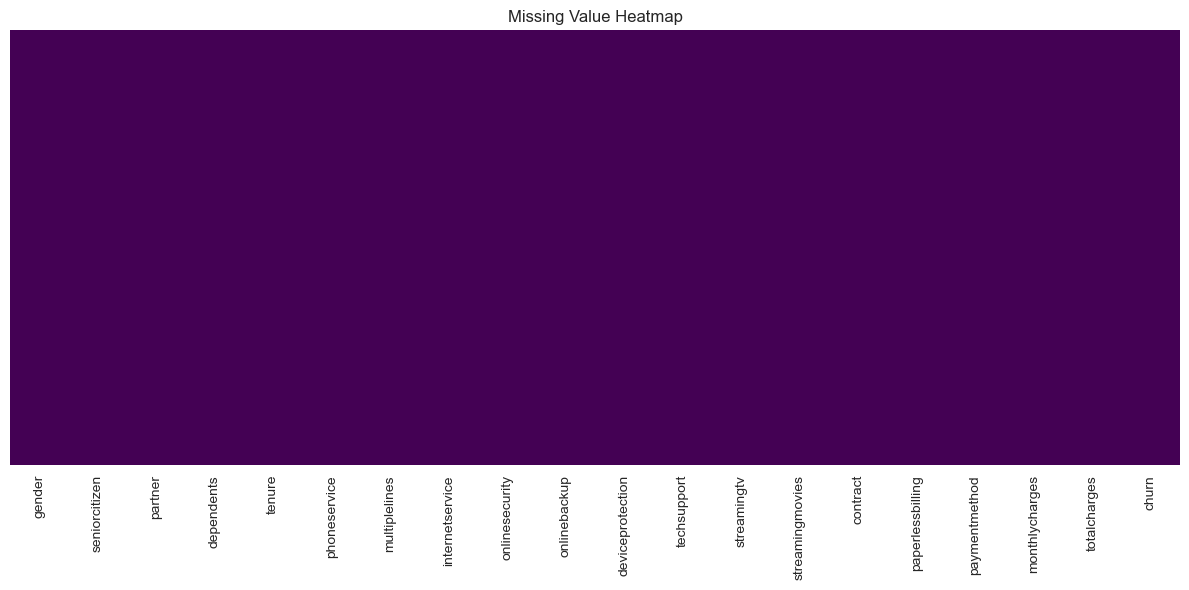

In [15]:

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()



### 3.2 Target Variable Analysis


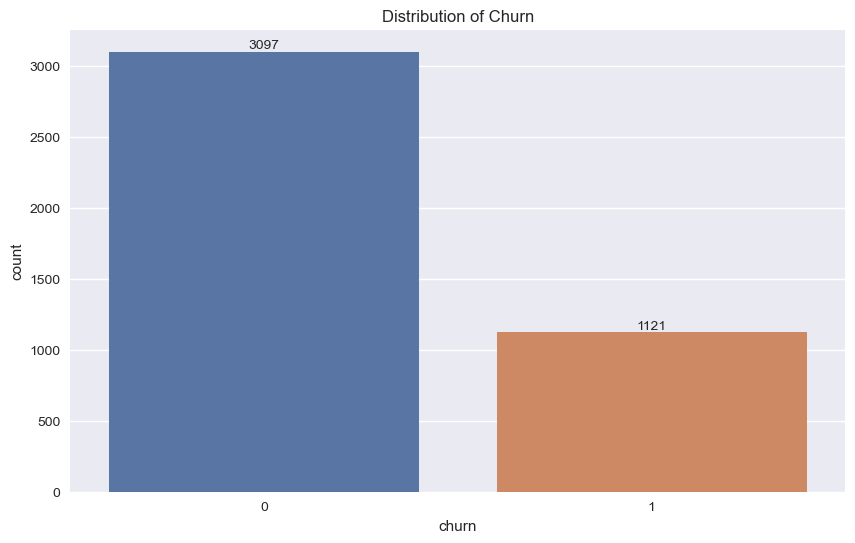

In [16]:

# Churn distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=train_df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
ax = sns.countplot(x='churn', data=train_df)
ax.bar_label(ax.containers[0])
plt.show()


In [17]:

# Calculate churn rate
churn_rate = train_df['churn'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")


Overall Churn Rate: 26.58%



### 3.3 Numerical Features Analysis


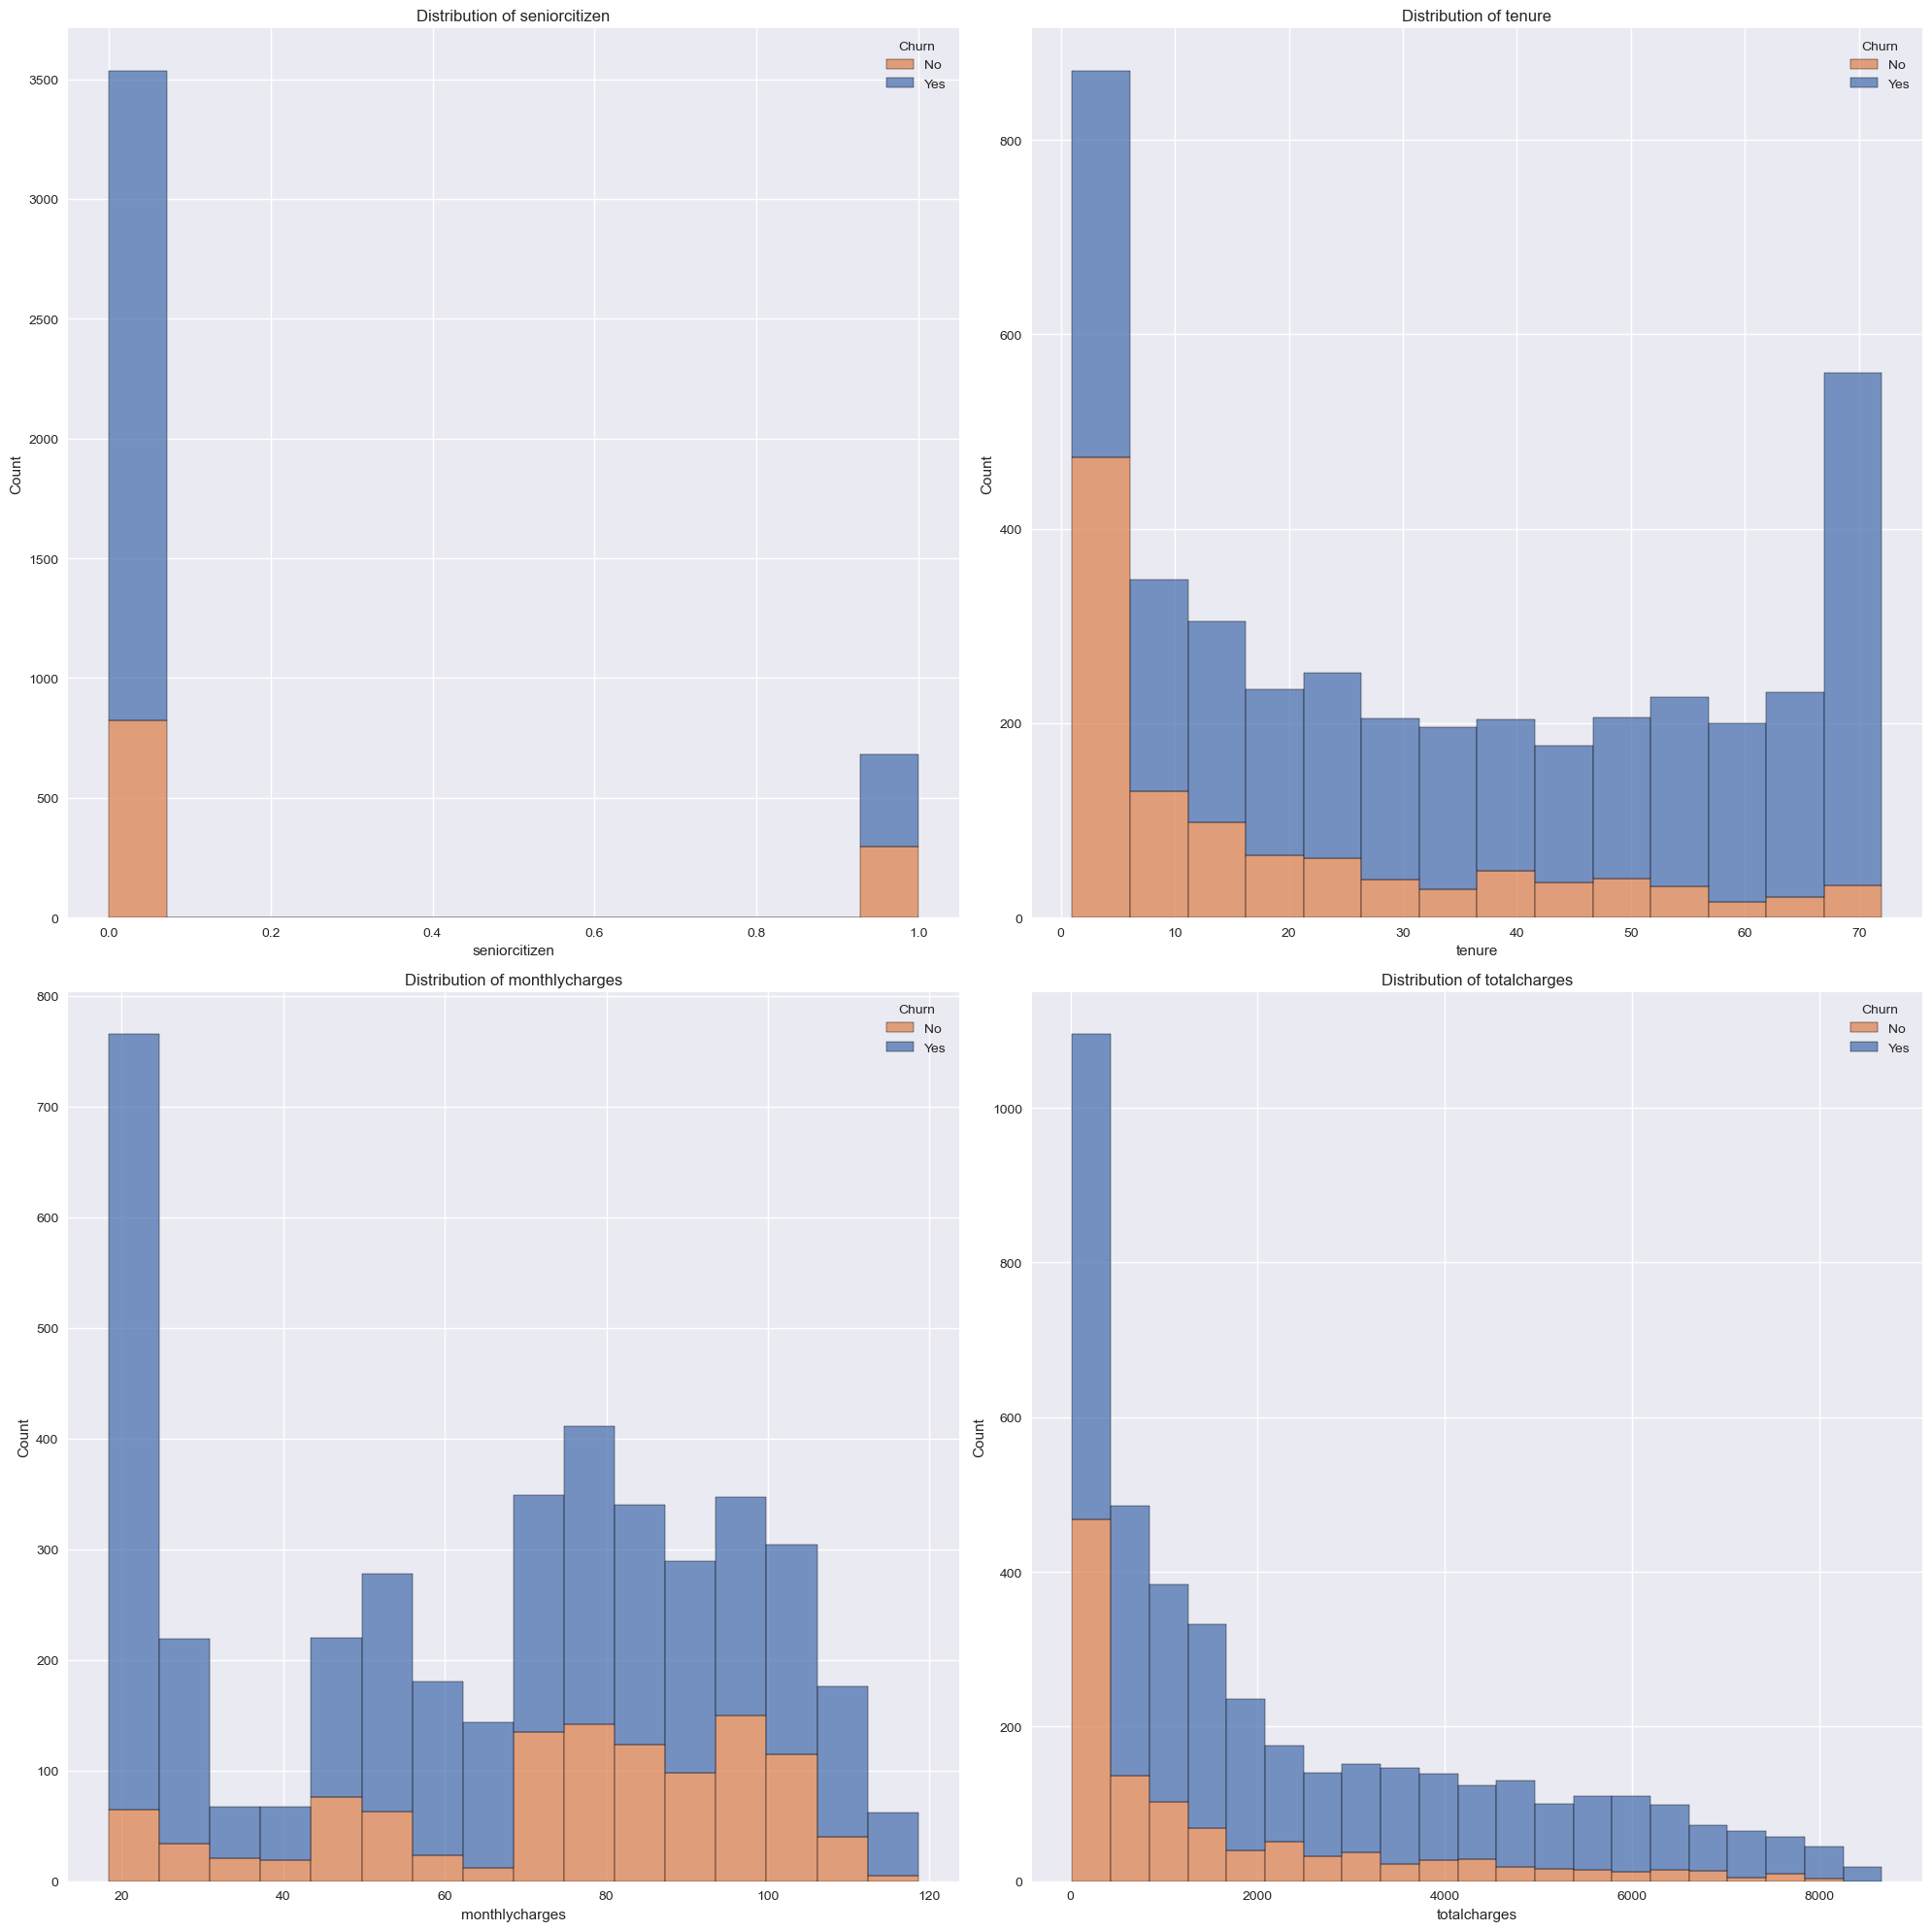

In [18]:

# Select numerical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
numerical_features.remove('churn')  # Remove target variable

# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, hue='churn', multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


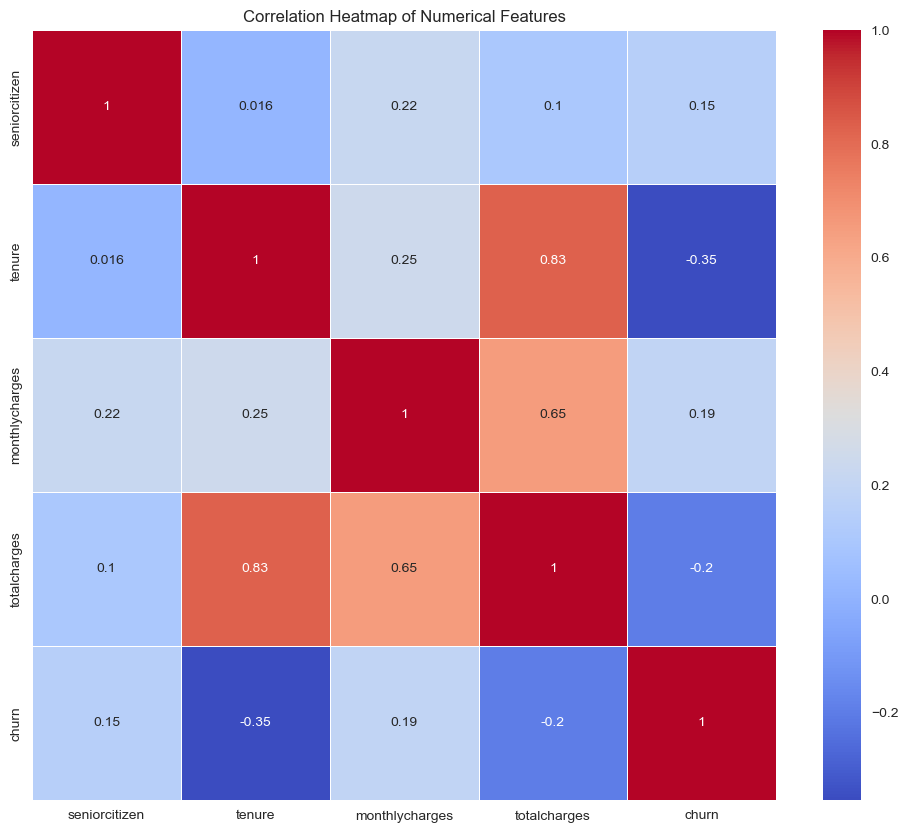

In [19]:

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = churn_df[numerical_features + ['churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



### 3.4 Categorical Features Analysis


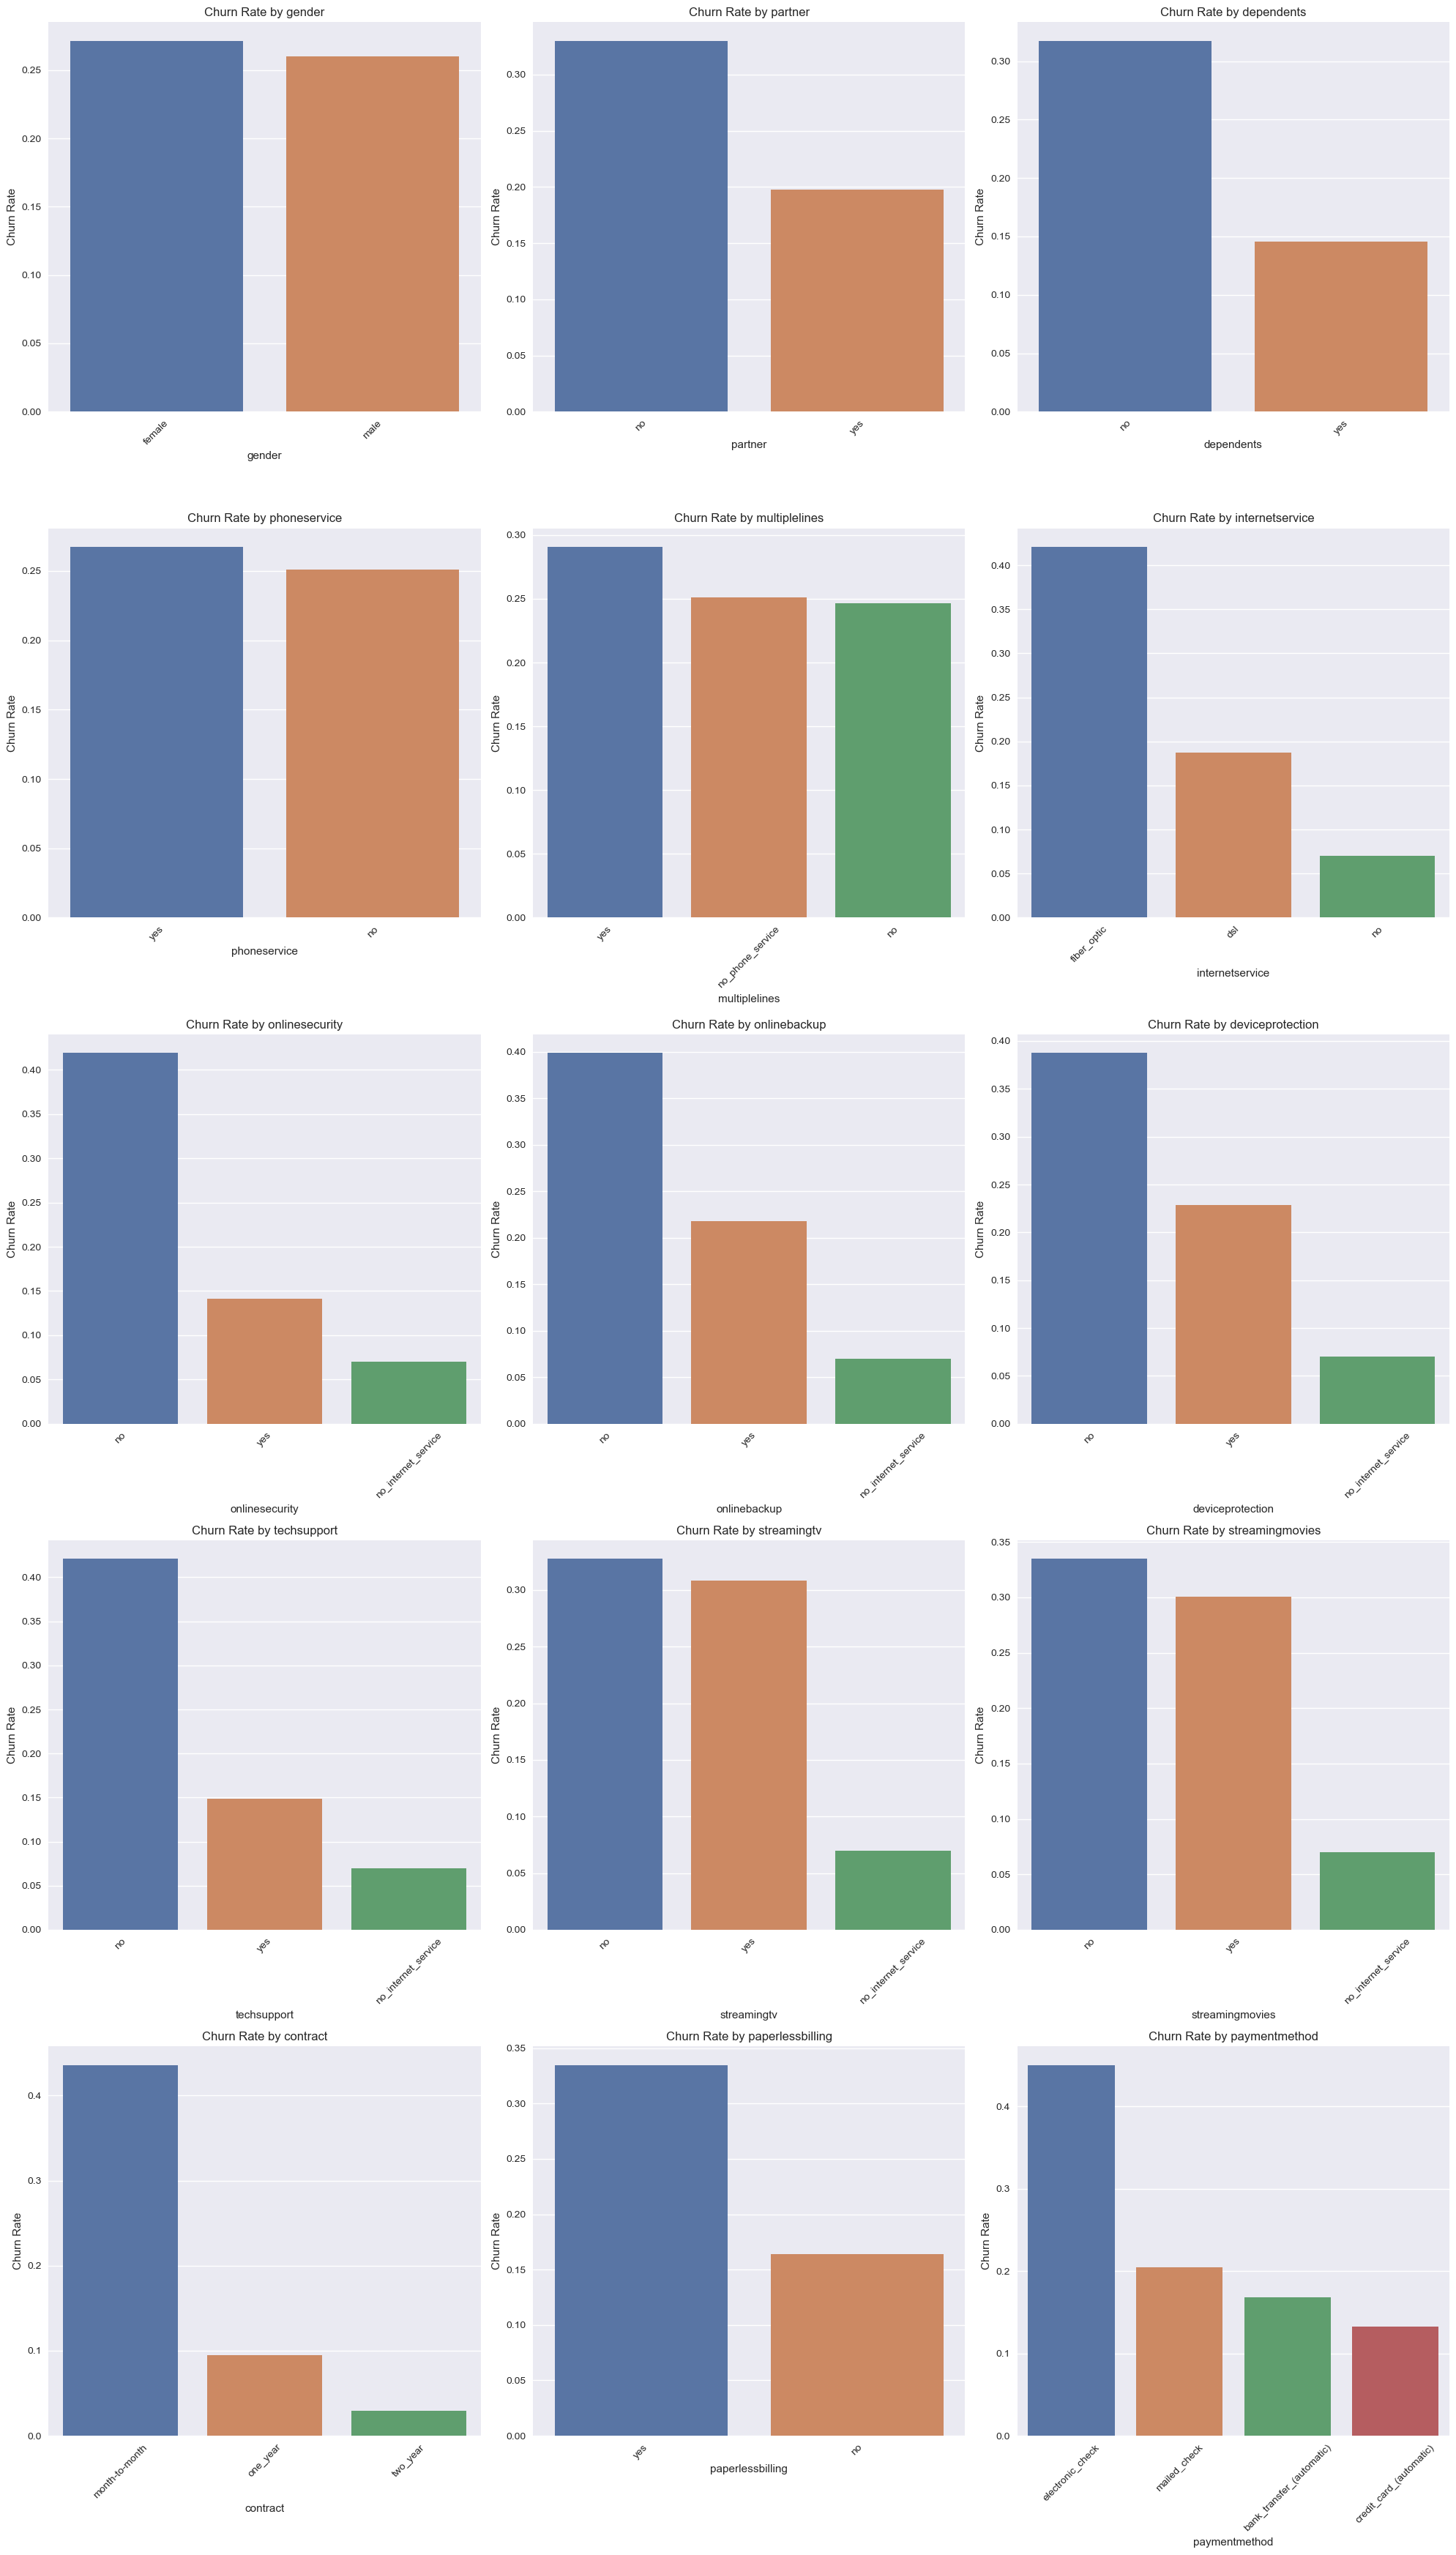

In [20]:

# Select categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# Churn rate by categorical features
num_features = len(categorical_features)
num_rows = (num_features + 2) // 3  # Calculate number of rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 7 * num_rows))
axes = axes.ravel()

for i, col in enumerate(categorical_features):
    churn_rate = train_df.groupby(col)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn Rate')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



### 3.5 Feature Importance Analysis


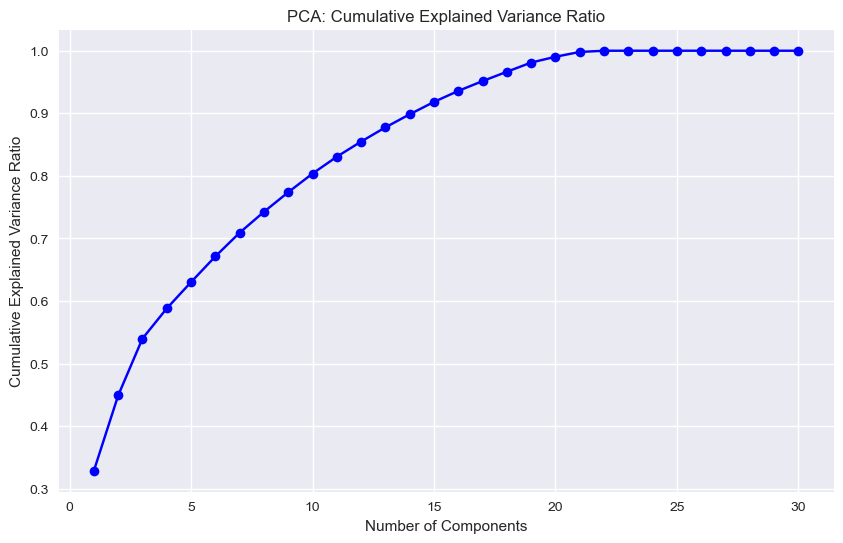

In [21]:

# Prepare data for feature importance
X = train_df.drop('churn', axis=1)
y = train_df['churn']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


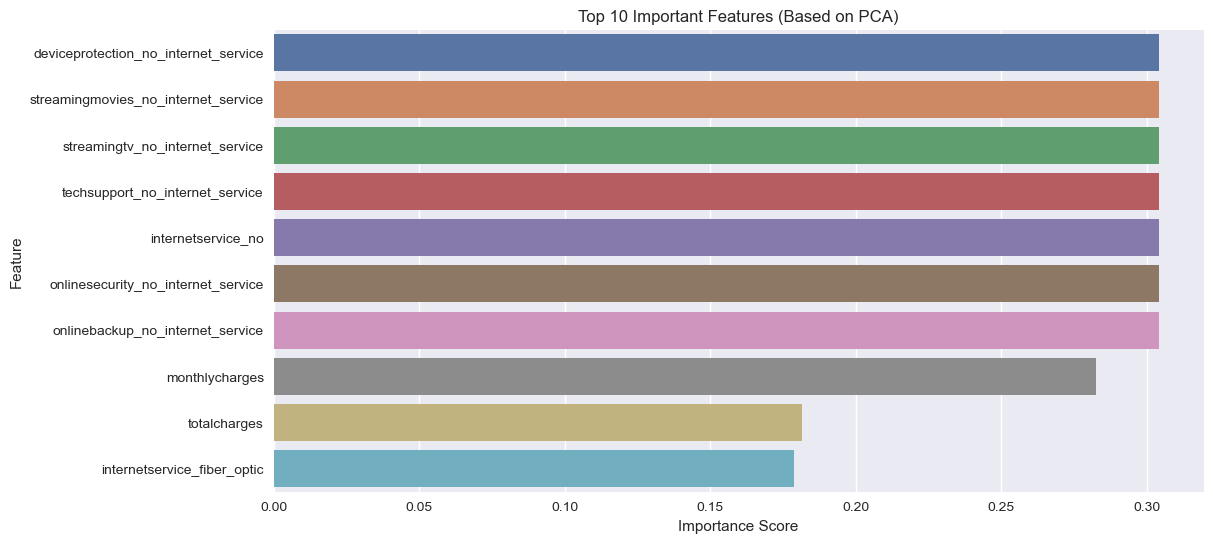

In [22]:

# Get feature importance scores
feature_importance = abs(pca.components_[0])
feature_names = X_encoded.columns

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

# Plot top 10 important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Important Features (Based on PCA)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### 3.6 Mutual Information Analysis


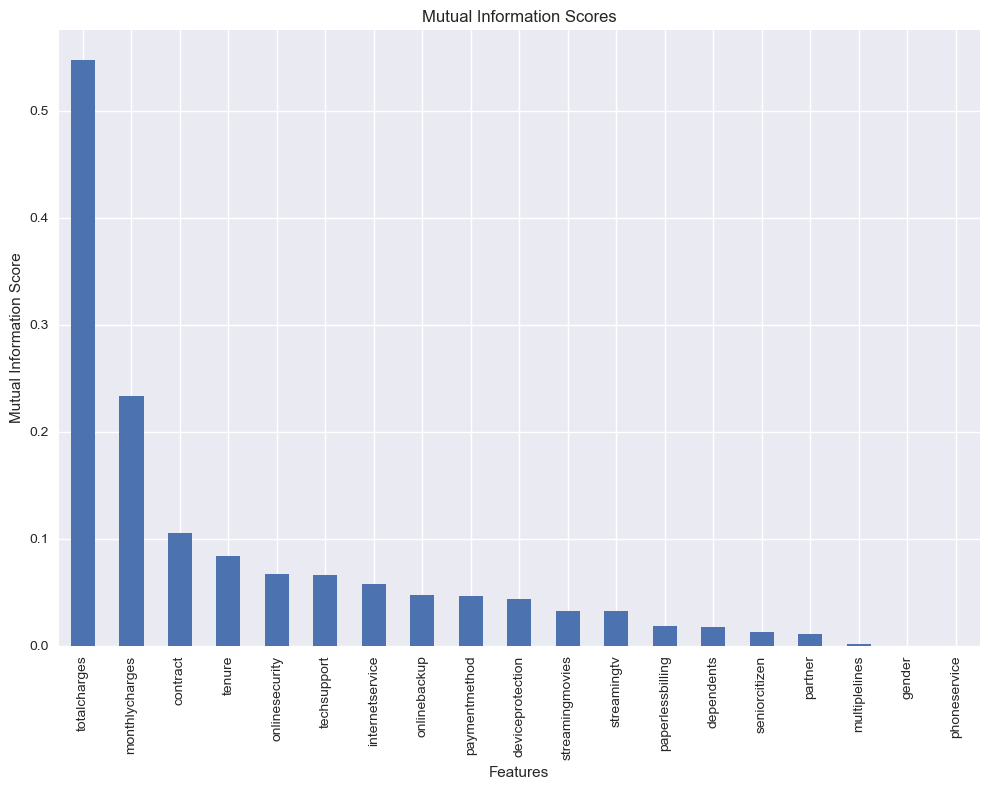


Mutual Information Scores:
totalcharges        0.547692
monthlycharges      0.233568
contract            0.105616
tenure              0.084195
onlinesecurity      0.067131
techsupport         0.066020
internetservice     0.057410
onlinebackup        0.047025
paymentmethod       0.046234
deviceprotection    0.043552
streamingmovies     0.032516
streamingtv         0.032163
paperlessbilling    0.018822
dependents          0.017212
seniorcitizen       0.013074
partner             0.011320
multiplelines       0.001180
gender              0.000083
phoneservice        0.000060
dtype: float64


In [23]:
### 3.8 Mutual Information Analysis

from sklearn.metrics import mutual_info_score
import numpy as np

# Function to compute mutual information scores
def compute_mi_scores(X, y):
    mi_scores = {}
    for colname in X.columns:
        mi_scores[colname] = mutual_info_score(y, X[colname])
    return pd.Series(mi_scores).sort_values(ascending=False)

# Prepare the data
X = train_df.drop('churn', axis=1)
y = train_df['churn']

# Compute MI scores
mi_scores = compute_mi_scores(X, y)

# Plot MI scores
plt.figure(figsize=(10, 8))
mi_scores.plot.bar(figsize=(10, 8))
plt.title("Mutual Information Scores")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.tight_layout()
plt.show()

# Print MI scores
print("\nMutual Information Scores:")
print(mi_scores)


### 3.7 Statistical Tests


In [24]:

# Chi-square test for categorical variables
print("Chi-square Test Results:")
for cat_feature in categorical_features:
    contingency_table = pd.crosstab(train_df[cat_feature], train_df['churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{cat_feature}: chi2 = {chi2:.2f}, p-value = {p_value:.4f}")

# T-test for numerical variables
print("\nT-test Results:")
for num_feature in numerical_features:
    churn_group = train_df[train_df['churn'] == 1][num_feature]
    non_churn_group = train_df[train_df['churn'] == 0][num_feature]
    t_stat, p_value = stats.ttest_ind(churn_group, non_churn_group)
    print(f"{num_feature}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")


Chi-square Test Results:
gender: chi2 = 0.64, p-value = 0.4240
partner: chi2 = 93.76, p-value = 0.0000
dependents: chi2 = 133.43, p-value = 0.0000
phoneservice: chi2 = 0.43, p-value = 0.5143
multiplelines: chi2 = 9.99, p-value = 0.0068
internetservice: chi2 = 451.32, p-value = 0.0000
onlinesecurity: chi2 = 525.76, p-value = 0.0000
onlinebackup: chi2 = 359.22, p-value = 0.0000
deviceprotection: chi2 = 327.57, p-value = 0.0000
techsupport: chi2 = 518.53, p-value = 0.0000
streamingtv: chi2 = 222.92, p-value = 0.0000
streamingmovies: chi2 = 226.22, p-value = 0.0000
contract: chi2 = 766.36, p-value = 0.0000
paperlessbilling: chi2 = 151.22, p-value = 0.0000
paymentmethod: chi2 = 397.97, p-value = 0.0000

T-test Results:
seniorcitizen: t-statistic = 11.08, p-value = 0.0000
tenure: t-statistic = -24.73, p-value = 0.0000
monthlycharges: t-statistic = 13.11, p-value = 0.0000
totalcharges: t-statistic = -13.36, p-value = 0.0000



### 3.8 Key Insights


In [25]:
print("\nKey Insights from EDA (Training Set):")
# print(f"1. The churn rate in the training set is {churn_rate:.2%}.")
print("2. The most important features for predicting churn are:", ", ".join(feature_importance_df['feature'].head(5).tolist()))
print("3. Most categorical variables show a statistically significant relationship with churn (p < 0.05 in chi-square tests), with the notable exceptions of:")
print("   - Gender (p > 0.05): This suggests that churn rates may not significantly differ between genders.")
print("   - Phone Service (p > 0.05): This indicates that having a phone service alone may not be a strong predictor of churn.")
print("4. All numerical variables show significant differences between churned and non-churned customers (p < 0.05 in t-tests).")
print("5. There's a strong correlation between total charges and tenure, which might indicate multicollinearity.")
print("6. The PCA analysis suggests that we might be able to reduce the dimensionality of our dataset while retaining most of the variance.")
print("\nRecommendations based on these insights:")
print("a. Consider removing or giving less weight to 'gender' and 'phoneservice' features in the predictive model.")
print("b. Investigate interactions between categorical variables and numerical variables, as some categories might be more predictive when combined with tenure or charges.")
print("c. Be cautious about including both 'tenure' and 'totalcharges' in the model due to their high correlation. Consider creating a derived feature or using only one of them.")
print("d. Explore non-linear relationships, especially for numerical variables, as the t-tests only capture linear differences between groups.")


Key Insights from EDA (Training Set):
2. The most important features for predicting churn are: deviceprotection_no_internet_service, streamingmovies_no_internet_service, streamingtv_no_internet_service, techsupport_no_internet_service, internetservice_no
3. Most categorical variables show a statistically significant relationship with churn (p < 0.05 in chi-square tests), with the notable exceptions of:
   - Gender (p > 0.05): This suggests that churn rates may not significantly differ between genders.
   - Phone Service (p > 0.05): This indicates that having a phone service alone may not be a strong predictor of churn.
4. All numerical variables show significant differences between churned and non-churned customers (p < 0.05 in t-tests).
5. There's a strong correlation between total charges and tenure, which might indicate multicollinearity.
6. The PCA analysis suggests that we might be able to reduce the dimensionality of our dataset while retaining most of the variance.

Recommendat

### 3.9 Data For Modeling


In [26]:
# Combine features and targets for test and validation sets

# For test set
test_df = pd.concat([X_test, y_test], axis=1)
print("Test set shape:", test_df.shape)
print("Test set columns:", test_df.columns.tolist())

# For validation set
val_df = pd.concat([X_val, y_val], axis=1)
print("Validation set shape:", val_df.shape)
print("Validation set columns:", val_df.columns.tolist())
    


Test set shape: (1407, 21)
Test set columns: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
Validation set shape: (1407, 21)
Validation set columns: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


In [27]:
# Drop specified columns from training, test, and validation sets
columns_to_drop = ['customerid', 'gender', 'phoneservice']

# For training set
train_df = train_df.drop(columns=['gender', 'phoneservice'])

# For test set
test_df = test_df.drop(columns=columns_to_drop)

# For validation set
val_df = val_df.drop(columns=columns_to_drop)

print("Updated shapes after dropping columns:")
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("Validation set shape:", val_df.shape)

print("\nUpdated columns:")
print("Training set columns:", train_df.columns.tolist())
print("Test set columns:", test_df.columns.tolist())
print("Validation set columns:", val_df.columns.tolist())


Updated shapes after dropping columns:
Training set shape: (4218, 18)
Test set shape: (1407, 18)
Validation set shape: (1407, 18)

Updated columns:
Training set columns: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
Test set columns: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
Validation set columns: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbillin

In [28]:

# Save processed datasets to CSV files in the processed folder

import os

# Define the path to the processed data folder
processed_data_path = r"C:\Users\HP\Desktop\telco-customer-churn\data\processed"

# Create the processed data folder if it doesn't exist
os.makedirs(processed_data_path, exist_ok=True)

# Save training set
train_df.to_csv(os.path.join(processed_data_path, "train_processed.csv"), index=False)
print(f"Training set saved to {os.path.join(processed_data_path, 'train_processed.csv')}")

# Save test set
test_df.to_csv(os.path.join(processed_data_path, "test_processed.csv"), index=False)
print(f"Test set saved to {os.path.join(processed_data_path, 'test_processed.csv')}")

# Save validation set
val_df.to_csv(os.path.join(processed_data_path, "validation_processed.csv"), index=False)
print(f"Validation set saved to {os.path.join(processed_data_path, 'validation_processed.csv')}")

print("\nAll processed datasets have been saved successfully.")




Training set saved to C:\Users\HP\Desktop\telco-customer-churn\data\processed\train_processed.csv
Test set saved to C:\Users\HP\Desktop\telco-customer-churn\data\processed\test_processed.csv
Validation set saved to C:\Users\HP\Desktop\telco-customer-churn\data\processed\validation_processed.csv

All processed datasets have been saved successfully.
